In [1]:
#import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap


In [2]:
df = pd.read_csv('Glassdoor Gender Pay Gap.csv')

## Data Exploration

In [3]:
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [4]:
df.shape

(1000, 9)

This dataset contains 1000 rows and 9 columns 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   int64 
 7   BasePay    1000 non-null   int64 
 8   Bonus      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


As we can see that our data looks quite good and dont have missing values 

In [6]:
df.columns

Index(['JobTitle', 'Gender', 'Age', 'PerfEval', 'Education', 'Dept',
       'Seniority', 'BasePay', 'Bonus'],
      dtype='object')

In [7]:
df.dtypes

JobTitle     object
Gender       object
Age           int64
PerfEval      int64
Education    object
Dept         object
Seniority     int64
BasePay       int64
Bonus         int64
dtype: object

## Data Wrangling

In [8]:
df['Total']= df['BasePay']+df['Bonus']

In [9]:
df

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,Total
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783
...,...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270,65914
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567,112544
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724,95071
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225,99601


## Check the outliers in the dataset 

/Users/yadavvinamrata/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


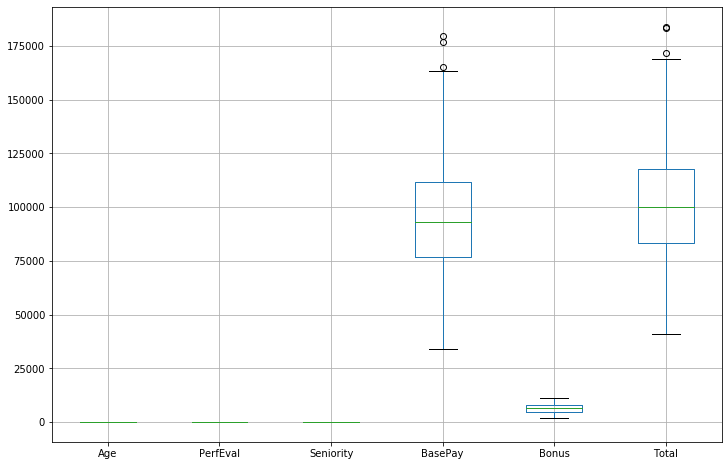

In [10]:
fig = plt.figure(figsize =(12,8))
df.boxplot()
fig.show()

As we can see there is not alot of outliers, means data is quite stable but still there is 2 columns BasePay and Total have some outliers, and seems normal because if someone get higher salary so, their total salry will be also higher lets find out the outliers 

In [11]:
IQR_BasePay = df['BasePay'].quantile(0.75)-df['BasePay'].quantile(0.25)
IQR_BasePay

34707.75

In [12]:
#To get the upper outliers
upper_outlier = df['BasePay'].quantile(0.75)+1.6*IQR_BasePay
upper_outlier

167090.4

In [13]:
#To get the lower outliers
lower_outlier = df['BasePay'].quantile(0.25)-1.6*IQR_BasePay
lower_outlier

21317.85

In [14]:
#To get the outlier
outliers = df[(df['BasePay']>upper_outlier)]
outliers

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,Total
353,Manager,Male,59,4,PhD,Sales,5,176789,6773,183562
927,Manager,Male,58,1,PhD,Management,4,179726,4284,184010


So, these two are outliers in our dataset, as we can see these two are paid higher than the expected 

In [15]:
IQR_Total = df['Total'].quantile(0.75)-df['Total'].quantile(0.25)
IQR_Total

34213.0

In [16]:
#To get the upper outliers
upper_outlier = df['Total'].quantile(0.75)+1.6*IQR_BasePay
upper_outlier

173188.4

In [17]:
#To get the lower outliers
lower_outlier = df['Total'].quantile(0.25)-1.6*IQR_BasePay
lower_outlier

27910.6

In [18]:
#To get the outlier
outliers = df[(df['Total']>upper_outlier)]
outliers

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,Total
353,Manager,Male,59,4,PhD,Sales,5,176789,6773,183562
927,Manager,Male,58,1,PhD,Management,4,179726,4284,184010


In [19]:
df.drop(outliers.index, inplace = True)

In [20]:
df.shape

(998, 10)

As we can see that both are equeal this shows that i have created the Total columns and it influenced by the BasePay column

## Data Analysis & Visualization 

## 1. Pairplot 

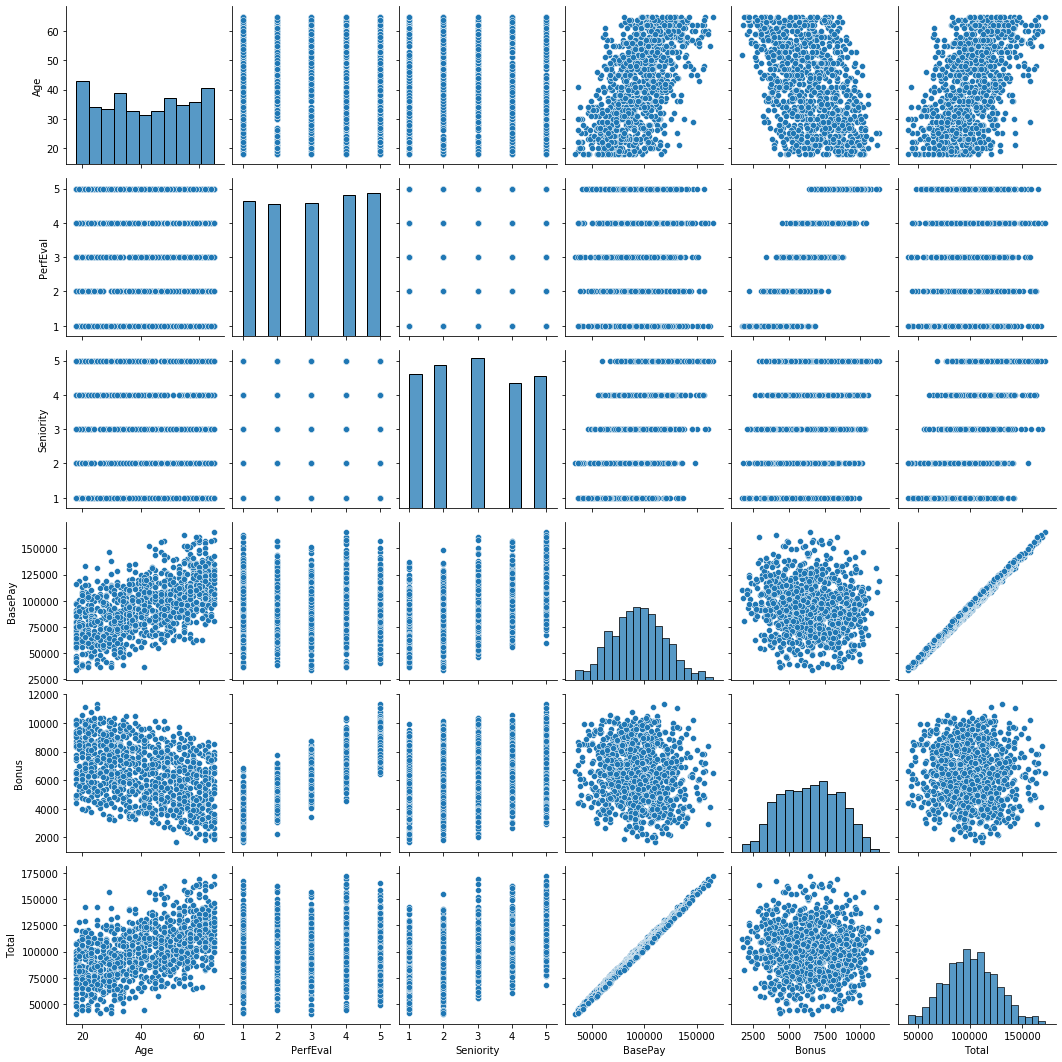

In [21]:
#To get the overall general understanding of whole dataset
sns.pairplot(df)

As pairplot signify the pairwise relationship in the dataset, and we can clearly see it. I like to plot pairplot because it gives me the overall information about each variable and their relationship with each other variables. here we can see that how the data is located betweet the variables 

## 2. Correlation heatmap 

/Users/yadavvinamrata/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


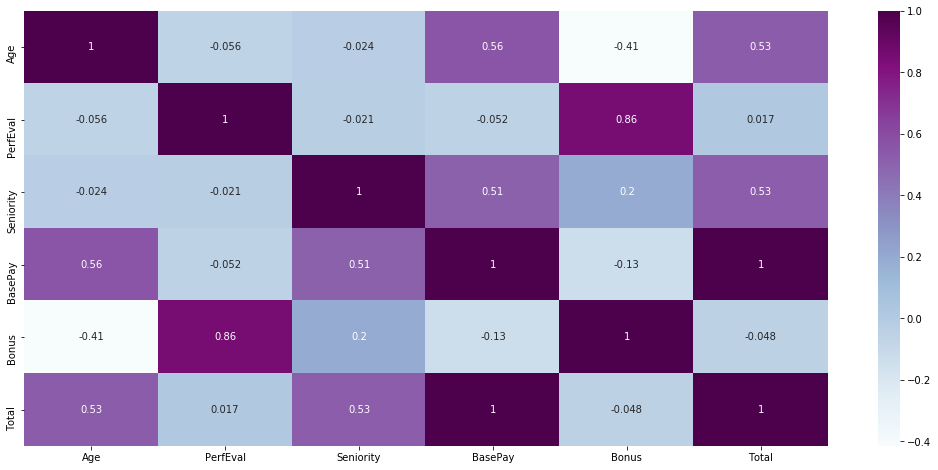

In [22]:
fig = plt.figure(figsize =(18,8))
sns.heatmap(df.corr(), annot = True, cmap ="BuPu")
fig.show()

To make it more clear and see the correration I ploted correlatio heatmap where we can see how much percentege each variables in the dataset are dependent on each other variables. as I found before in the outlier the total amount is completely dependent on BasePay. bonus is highly related to PerfEval

## 4. plotting the gender gap salary per Job 

In [23]:
#pivot table to get the BasePay per gender
data = df.pivot_table(index = 'JobTitle', columns = 'Gender', values = 'BasePay', aggfunc = 'sum')
data

Gender,Female,Male
JobTitle,,
Data Scientist,5072354,4818022
Driver,3995911,4137870
Financial Analyst,4677458,5487208
Graphic Designer,4427678,4479790
IT,4523786,4187011
Manager,2290541,8632608
Marketing Associate,8144752,900700
Sales Associate,3951451,4827819
Software Engineer,757608,10743520


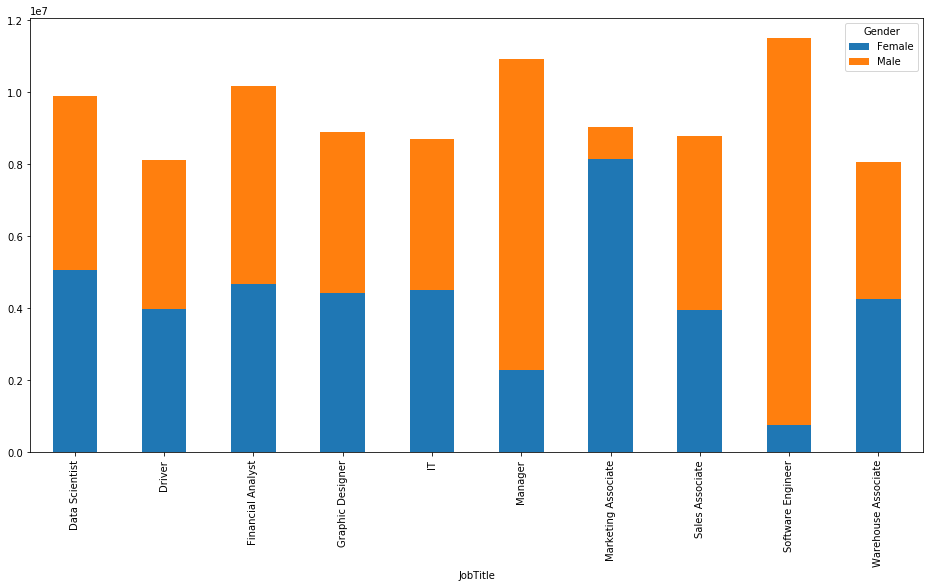

In [24]:
data.loc[:,['Female','Male']].plot.bar(stacked=True,figsize=(16,8))

As we can see that there is gender gap in the payscale only one jobtitle have where the female is paid more than male i.e Marketing Associate but Data scientist are paid equally there is no pay gap between gender, except these at every jobtitle female is paid less sometime very less like Software engineer and Manager 

## 3. Plotting  Bonus, Total -> Jobtitle per Gender 

In [25]:
dt = df.pivot_table(index = 'JobTitle', columns = 'Gender', values = ['Bonus', 'Total'], aggfunc = 'sum')
dt

Bonus            Total          
Gender               Female    Male   Female      Male
JobTitle                                              
Data Scientist       357616  336278  5429970   5154300
Driver               291167  290931  4287078   4428801
Financial Analyst    307981  377541  4985439   5864749
Graphic Designer     315222  349414  4742900   4829204
IT                   318111  286010  4841897   4473021
Manager              107856  426719  2398397   9059327
Marketing Associate  656121   69078  8800873    969778
Sales Associate      272032  317752  4223483   5145571
Software Engineer     51571  672895   809179  11416415
Warehouse Associate  352161  299648  4603861   4107999

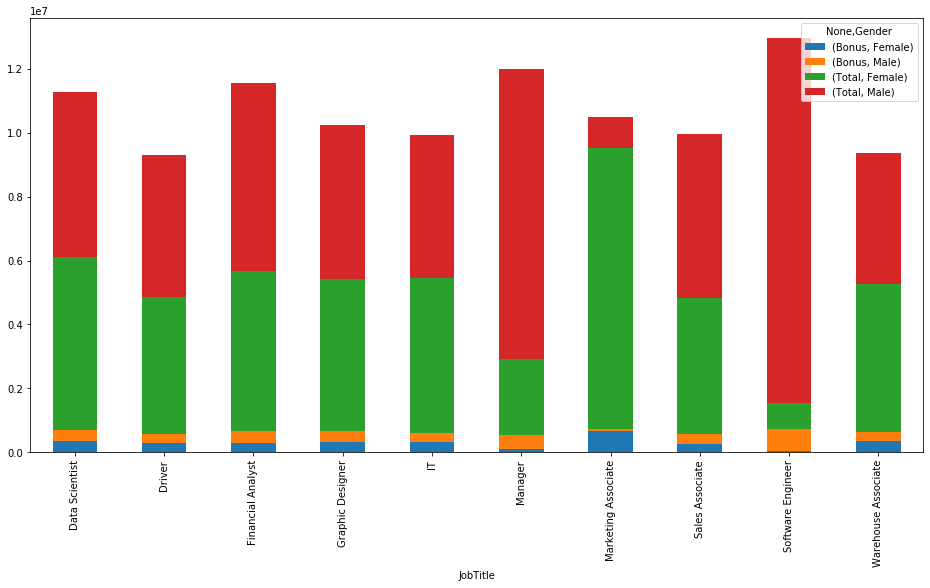

In [26]:
dt.loc[:,['Bonus','Total']].plot.bar(stacked=True,figsize=(16,8))

As we can see the Bonus dont have much gap, seems if female is paid less than male on a specific Jobtitle but the bonus is equal

## 5. Education (how education level affect the pay for the same job title)

In [27]:
ed= df.pivot_table(index = 'JobTitle', columns = 'Education', values = 'BasePay', aggfunc = 'sum')
ed

Education,College,High School,Masters,PhD
JobTitle,,,,
Data Scientist,1750912,2300653,2989199,2849612
Driver,2311452,1758671,1848845,2214813
Financial Analyst,2463727,2500612,2750952,2449375
Graphic Designer,2259758,1871787,2978197,1797726
IT,2553398,1878222,2229862,2049315
Manager,2886439,2433465,2622746,2980499
Marketing Associate,2019459,2706589,2104660,2214744
Sales Associate,1770467,2606701,2336443,2065659
Software Engineer,1947928,3206877,3478267,2868056


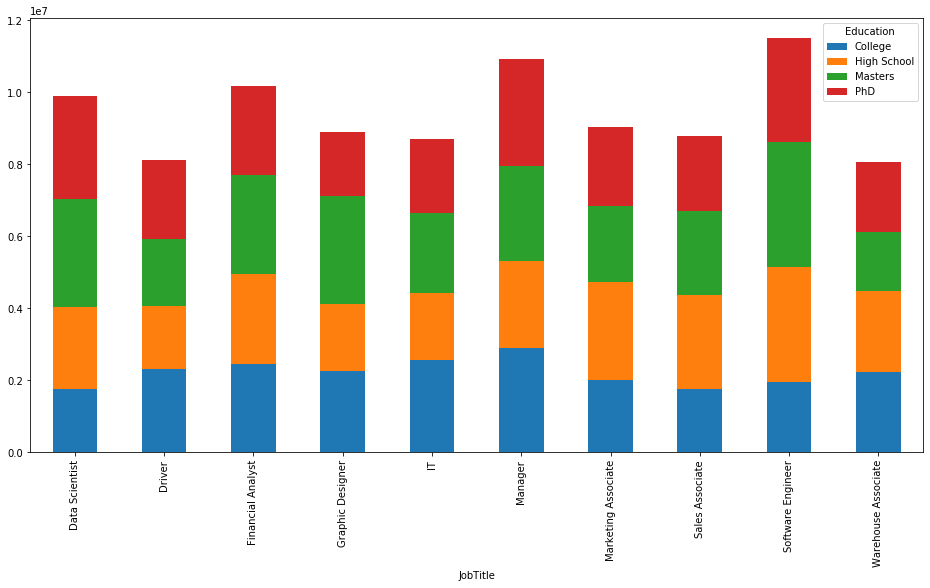

In [28]:
ed.loc[:,['College', 'High School','Masters','PhD']].plot.bar(stacked=True,figsize=(16,8))

## 6. Gender pay-gap on the basis of performance 

In [29]:
perf_dt = df.pivot_table(index = 'PerfEval', columns = 'Gender', values = 'BasePay', aggfunc = 'sum')
perf_dt

Gender,Female,Male
PerfEval,,
1,9932535,9109308
2,8285258,10019957
3,7668281,10295497
4,8455839,11020453
5,7751326,11577684


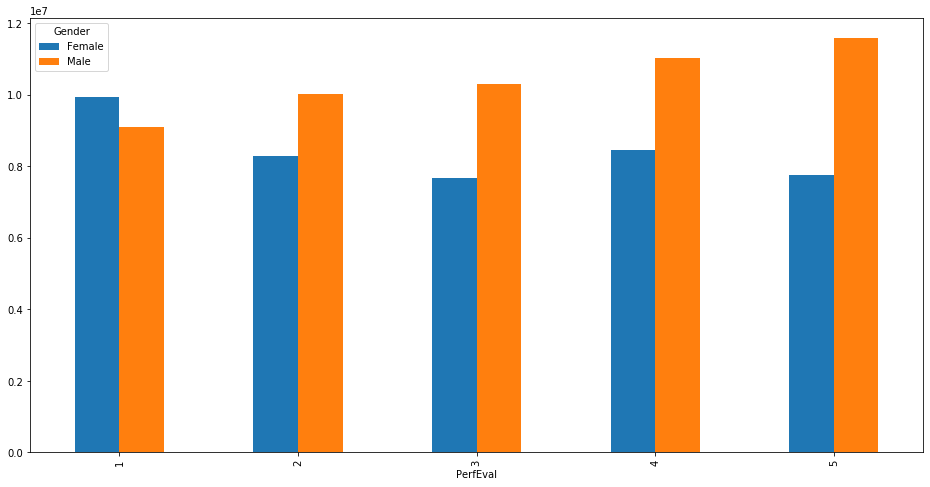

In [30]:
perf_dt.loc[:,['Female','Male']].plot.bar(stacked=False,figsize=(16,8))

## 7. Gender pay-gap on the basis of department 

In [31]:
dept_dt = df.pivot_table(index = 'Dept', columns = 'Gender', values = 'BasePay', aggfunc = 'sum')
dept_dt

Gender,Female,Male
Dept,,
Administration,8271828,9424733
Engineering,8078971,10447599
Management,8063074,10862809
Operations,8299791,10615502
Sales,9379575,10672256


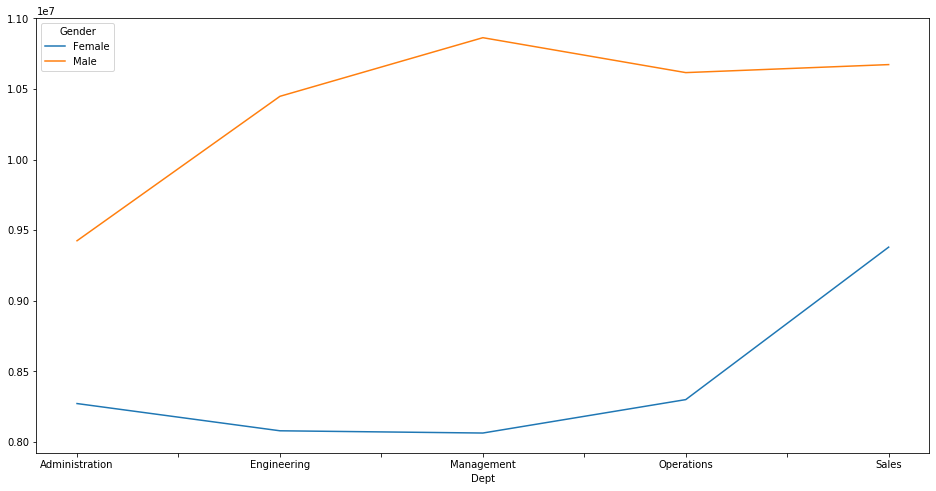

In [32]:
dept_dt.loc[:,['Female','Male']].plot.line(figsize=(16,8))

## 8. Does pay-gap in seniority level also

In [33]:
seniority_dt = df.pivot_table(index = 'Seniority', columns = 'Gender', values = 'BasePay', aggfunc = 'sum')
seniority_dt

Gender,Female,Male
Seniority,,
1,5766031,9217838
2,8112805,9577042
3,9675898,11058944
4,7946111,11037059
5,10592394,11132016


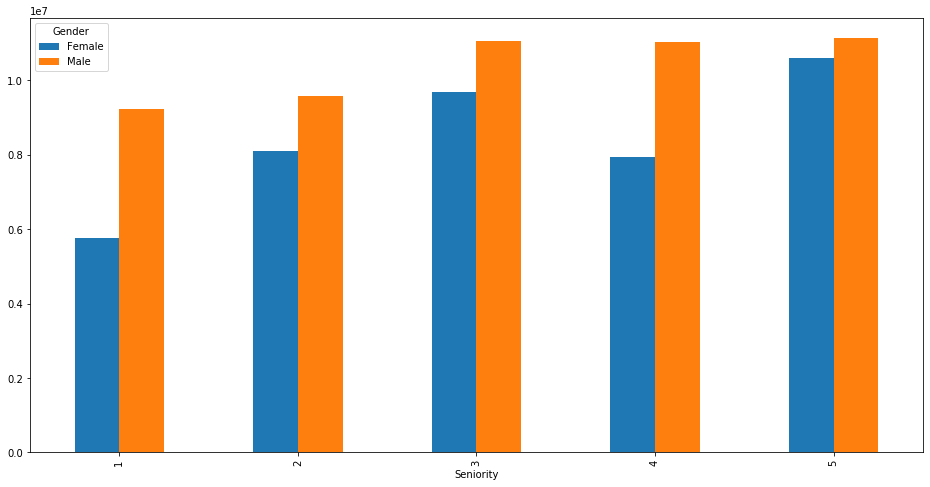

In [34]:
seniority_dt.loc[:,['Female','Male']].plot.bar(stacked=False,figsize=(16,8))

As we can see that at seniority level pay-gap still exist but at senior level 5 the gap is little lower than others